In [2]:
# Cell 2: Import and parse the CIF (CORRECTED)
import numpy as np
import sys
sys.path.insert(0, '.')  # Add current directory to path

# Re-import with updated code
import importlib
import cif_parser
importlib.reload(cif_parser)
from cif_parser import parse_cif_to_nja, cif_to_bkq, visualize_coordination_sphere

# Define the CIF file path
CIF_FILE = r'C:\Users\Timur\Downloads\0.991_HoFeO3.mcif'

# Define charges
charges = {
    'Ho': 3.0,   # Ho³⁺ (rare earth)
    'Fe': 3.0,   # Fe³⁺ (in perovskite structure)
    'O': -2.0    # O²⁻
}

print("Parsing HoFeO3 structure...")
print("=" * 70)

data = parse_cif_to_nja(
    cif_file=CIF_FILE,
    metal_center='Ho',  # Now works! Will find Yb1 and Yb2
    coordination_cutoff=3.5,
    charge_dict=charges,
    output_file='Ho_coordination.txt'
)

print("\n" + "=" * 70)
print("Successfully created coordination sphere data!")

Parsing HoFeO3 structure...
Detected mCIF (magnetic CIF) file

Structure Information
Formula: HoFeO3
Space group: ('Pnma', 62)

Unit cell parameters:
  a = 5.2779 Å
  b = 5.5873 Å
  c = 7.6011 Å
  α = 90.00°
  β = 90.00°
  γ = 90.00°

Atoms in asymmetric unit:
  0: Ho       at fractional coords [0.4813 0.4314 0.75  ]
  1: Ho       at fractional coords [0.5187 0.5686 0.25  ]
  2: Ho       at fractional coords [0.0187 0.9314 0.75  ]
  3: Ho       at fractional coords [0.9813 0.0686 0.25  ]
  4: Fe       at fractional coords [0.5 0.  0. ]
  5: Fe       at fractional coords [0.5 0.  0.5]
  6: Fe       at fractional coords [0.  0.5 0.5]
  7: Fe       at fractional coords [0.  0.5 0. ]
  8: O        at fractional coords [0.6098 0.0399 0.75  ]
  9: O        at fractional coords [0.3902 0.9601 0.25  ]
  10: O        at fractional coords [0.8902 0.5399 0.75  ]
  11: O        at fractional coords [0.1098 0.4601 0.25  ]
  12: O        at fractional coords [0.692  0.3048 0.0564]
  13: O        at 

Figure saved to: ho_coordination_sphere.png


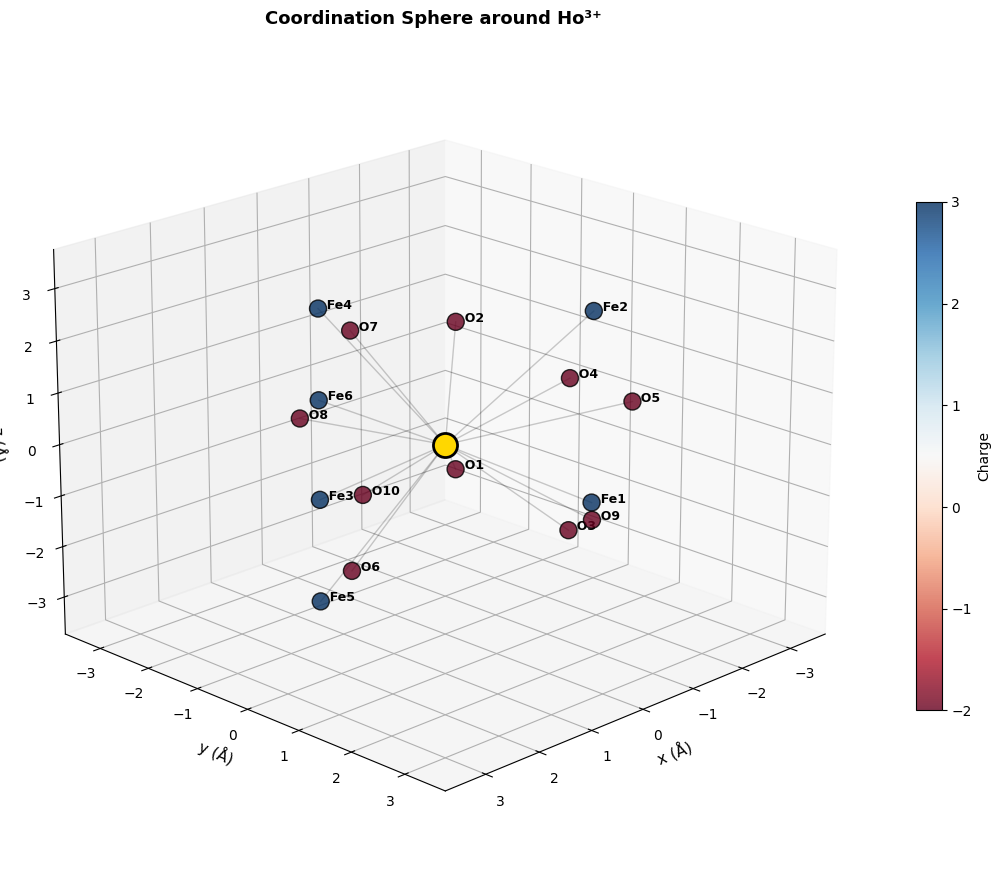

In [3]:
# Cell 3: Visualize the coordination environment
visualize_coordination_sphere(
    data, 
    metal_label='Ho³⁺',
    save_fig='ho_coordination_sphere.png'
)

In [ ]:
# Cell 4: Calculate crystal field parameters
# Yb³⁺ has electron configuration f¹³ (or 4f¹³)
dic_bkq = cif_to_bkq(
    cif_file=CIF_FILE,
    metal_center='Ho',
    configuration='d5',  # Ho³⁺ # Sternheimer shielding parameters for d^n configurations are not implemented.
    coordination_cutoff=3.5,
    charge_dict=charges,
    use_sternheimer=True  # Use shielding parameters
)

print("\nCrystal field parameters (Bₖᵍ) in cm⁻¹:")
print("=" * 50)
for k in sorted(dic_bkq.keys(), key=int):
    print(f"\nk = {k}:")
    for q in sorted(dic_bkq[k].keys(), key=lambda x: int(x)):
        value = dic_bkq[k][q]
        if abs(value) > 1e-6:
            print(f"  B{k},{q:>3s} = {value:12.6f}")



************************************************************
   NJA-CFS (Not Just Another - Crystal Field Software)
   Version: 1.2.0
   Date: October 07, 2025
************************************************************




c:\Users\Timur\Documents\Python_Scripts\crystal-hub\raw_packages\NJA-CFS\nja_cfs_red.py:2110: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(complex128, 2, 'A', False, aligned=True), Array(complex128, 1, 'C', False, aligned=True))
  mu_single = np.dot(np.conj(np.ascontiguousarray(result[1:, ii]).T), np.dot(mu_matrix[kk, ...], np.ascontiguousarray(result[1:, ii])))


Detected mCIF (magnetic CIF) file

Structure Information
Formula: HoFeO3
Space group: ('Pnma', 62)

Unit cell parameters:
  a = 5.2779 Å
  b = 5.5873 Å
  c = 7.6011 Å
  α = 90.00°
  β = 90.00°
  γ = 90.00°

Atoms in asymmetric unit:
  0: Ho       at fractional coords [0.4813 0.4314 0.75  ]
  1: Ho       at fractional coords [0.5187 0.5686 0.25  ]
  2: Ho       at fractional coords [0.0187 0.9314 0.75  ]
  3: Ho       at fractional coords [0.9813 0.0686 0.25  ]
  4: Fe       at fractional coords [0.5 0.  0. ]
  5: Fe       at fractional coords [0.5 0.  0.5]
  6: Fe       at fractional coords [0.  0.5 0.5]
  7: Fe       at fractional coords [0.  0.5 0. ]
  8: O        at fractional coords [0.6098 0.0399 0.75  ]
  9: O        at fractional coords [0.3902 0.9601 0.25  ]
  10: O        at fractional coords [0.8902 0.5399 0.75  ]
  11: O        at fractional coords [0.1098 0.4601 0.25  ]
  12: O        at fractional coords [0.692  0.3048 0.0564]
  13: O        at fractional coords [0.308  0.

NotImplementedError: Sternheimer shielding parameters for d^n configurations are not implemented.

In [ ]:
# Cell 5: Run NJA-CFS calculation
import nja_cfs_red as nja

# Get free ion parameters for Yb³⁺ (f¹³)
params = nja.free_ion_param_f_HF('f13')

print("Free ion parameters for Yb³⁺ (f¹³):")
print(f"F² = {params['F2']:.1f} cm⁻¹")
print(f"F⁴ = {params['F4']:.1f} cm⁻¹")
print(f"F⁶ = {params['F6']:.1f} cm⁻¹")
print(f"ζ  = {params['zeta']:.1f} cm⁻¹")

# Create calculation
calc = nja.calculation('f13', ground_only=True, TAB=True, wordy=True)

# Run with all interactions
result = calc.MatrixH(
    ['Hee', 'Hso', 'Hcf'],
    F2=params['F2'],
    F4=params['F4'],
    F6=params['F6'],
    zeta=params['zeta'],
    dic_bkq=dic_bkq,
    wordy=True
)

energies = result[0, :].real - result[0, 0].real
print(f"\nCrystal field splitting: {energies[-1]:.2f} cm⁻¹")